In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('Immunotherapy.csv')
df

sex  age   Time  Number_of_Warts  Type  Area  Result_of_Treatment
0     1   35  12.00                5     1   100                    0
1     1   29   7.00                5     1    96                    1
2     1   50   8.00                1     3   132                    0
3     1   32  11.75                7     3   750                    0
4     1   67   9.25                1     1    42                    0
..  ...  ...    ...              ...   ...   ...                  ...
85    2   34  12.00                3     3    95                    0
86    2   20   3.50                6     1    75                    1
87    2   35   8.25                8     3   100                    0
88    1   24  10.75               10     1    20                    1
89    1   19   8.00                8     1   160                    1

[90 rows x 7 columns]

In [3]:
x = df[['sex','age','Time','Number_of_Warts','Type','Area']]
y = df['Result_of_Treatment']

In [4]:
xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.2, random_state=1)
print('xtr : ',xtr.shape)
print('xts : ',xts.shape)
print('ytr : ',ytr.shape)
print('yts : ',yts.shape)

xtr :  (72, 6)
xts :  (18, 6)
ytr :  (72,)
yts :  (18,)


In [5]:
logreg = LogisticRegression() 

logreg.fit(xtr, ytr)

ypr = logreg.predict(xts)

print('yts : ' , yts.values)
print('ypr : ' , ypr)
print('score : ' , np.round(logreg.score(xts, yts)*100,2),'%')
# or : 
# print('score : ' , np.round(metrics.accuracy_score(yts,ypr)*100,2),'%')

yts :  [1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0]
ypr :  [1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0]
score :  77.78 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


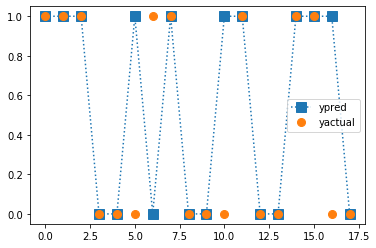

In [6]:
plt.plot(np.arange(len(ypr)), ypr,':s', markersize=10, label='ypred'); # predicted
plt.plot(np.arange(len(ypr)), yts,'o', markersize=8, label='yactual'); # actual
plt.legend(); 

In [7]:
metrics.confusion_matrix(yts, ypr)

array([[7, 3],
       [1, 7]], dtype=int64)

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
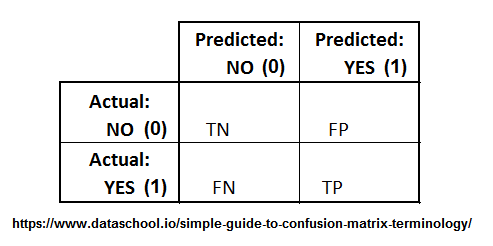

In [8]:
tn, fp, fn, tp = metrics.confusion_matrix(yts, ypr).ravel() # watched this through help (by pressing shift+tab)
print('tn : ',tn)
print('fp : ',fp)
print('fn : ',fn)
print('tp : ',tp)

tn :  7
fp :  3
fn :  1
tp :  7


In [9]:
report = metrics.classification_report(yts, ypr)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.70      0.88      0.78         8

    accuracy                           0.78        18
   macro avg       0.79      0.79      0.78        18
weighted avg       0.80      0.78      0.78        18



In [10]:
acc = (tp+tn) / (tp+tn+fp+fn)
acc

0.7777777777777778

In [11]:
pre = tp / (tp+fp)
pre

0.7

In [12]:
rec = tp / (tp+fn)
rec

0.875

In [13]:
fsc = (2*rec*pre) / (rec+pre)
fsc

0.7777777777777777

In [14]:
# Accuracy: Overall, how often is the classifier correct?
# (TP+TN)/total 

# Misclassification Rate: Overall, how often is it wrong?
# (FP+FN)/total 
# equivalent to 1 minus Accuracy
# also known as "Error Rate"

# True Positive Rate: When it's actually yes, how often does it predict yes?
# TP/actual yes 
# also known as "Sensitivity" or "Recall"

# False Positive Rate: When it's actually no, how often does it predict yes?
# FP/actual no 

# True Negative Rate: When it's actually no, how often does it predict no?
# TN/actual no 
# equivalent to 1 minus False Positive Rate
# also known as "Specificity"

# Precision: When it predicts yes, how often is it correct?
# TP/predicted yes 

# Prevalence: How often does the yes condition actually occur in our sample?
# actual yes/total 

# F-score : This is a weighted average of the true positive rate (recall) and precision.
# (2*recall*precision)/(recall+precision)